In [1]:
%matplotlib inline

In [2]:
import pyathena as pa
from pyathena.set_plt import *

In [3]:
import glob

In [4]:
def norm_log_hist_plot(hist,edges,**kwargs):
    if hist.sum() > 0: 
        plt.bar(edges[:-1],hist,np.diff(edges),align='edge',**kwargs)


In [8]:
def plot_sf_mass_func(sf):

    sp=pa.read_starvtk(sf)

    plt.ylim(0.5,100)
    plt.xlim(2,7)
    plt.yscale('log')

    if len(sp) >0:
        if 'flag' in sp:
            cl=sp[(sp.mass > 0) & (sp.flag > -2)]
            cl_young=sp[(sp.mass > 0) & (sp.flag > -2) & (sp.mage*units['Myr'] < 40)]
            cl_ini=sp[(sp.mass > 0) & (sp.flag == -2)]
        else:
            cl=sp[(sp.mass > 0) & (sp.age < sp.time)]
            cl_young=sp[(sp.mass > 0) & (sp.age < sp.time) & (sp.age*units['Myr'] < 40)]
            cl_ini=sp[(sp.mass > 0) & (sp.age > sp.time)]

        cl_hist,cl_edges=np.histogram(np.log10(cl.mass*units['Msun']),range=[2,7],bins=50)
        cl_young_hist,cl_young_edges=np.histogram(np.log10(cl_young.mass*units['Msun']),range=[2,7],bins=50)
        cl_ini_hist,cl_ini_edges=np.histogram(np.log10(cl_ini.mass*units['Msun']),range=[2,7],bins=50)

        norm_log_hist_plot(cl_ini_hist,cl_ini_edges,alpha=0.5,label='initial clusters',color='C0')
        norm_log_hist_plot(cl_hist,cl_edges,alpha=0.8,label='all new clusters',color='C1')
        norm_log_hist_plot(cl_young_hist,cl_young_edges,label='new young clusters',color='C2')

        plt.text(6.,10,'t={:6.2f}Myr'.format(sp.time[0]*units['Myr']))

In [10]:
def calc_normed_mass_funct(sf,trange=None):

    sp=pa.read_starvtk(sf)

    if len(sp) >0:
        if trange == None:
            t1 = 0
            t2 = sp.time[0]
        else:
            t1,t2 = trange
        birth_time = sp.time-sp.age
        if 'flag' in sp:
            cl=sp[(sp.mass > 0) & (sp.flag > -2) & (birth_time > t1) & (birth_time < t2)]
        else:
            cl=sp[(sp.mass > 0) & (birth_time > t1) & (birth_time < t2)]

        cl_hist,cl_edges=np.histogram(np.log10(cl.mass*units['Msun']),range=[2,7],bins=50)

        return cl_hist, cl_edges, sp.time[0]*units['Myr']


In [6]:
dirs=glob.glob('{}/R*metal/starpar'.format(base))
ids=[]
for dd in dirs:
    ids.append(dd.split('/')[-2])
print ids
pid='R2_4pc_noacc_largebox'
ids=['R2_4pc_noacc_largebox']

['R2_1pc_metal', 'R8_4pc_metal', 'R16_8pc_metal', 'R4_2pc_metal']


In [7]:
for pid in ids:
    starfiles=glob.glob('{}{}/starpar/{}.*.starpar.vtk'.format(base,pid,pid))
    png_files=glob.glob('{}{}/starpar/{}.*.starpar.massfunc.png'.format(base,pid,pid))
    nf1=len(starfiles)
    nf2=len(png_files)
    starfiles.sort()
    print pid, nf1, nf2
    if nf1 > nf2:
        plt.clf()
        for sf in starfiles:
            plot_sf_mass_func(sf)
        plt.legend()
        plt.savefig('{}massfunc.png'.format(sf.replace('vtk','')))
        

R2_4pc_noacc_largebox 107 0


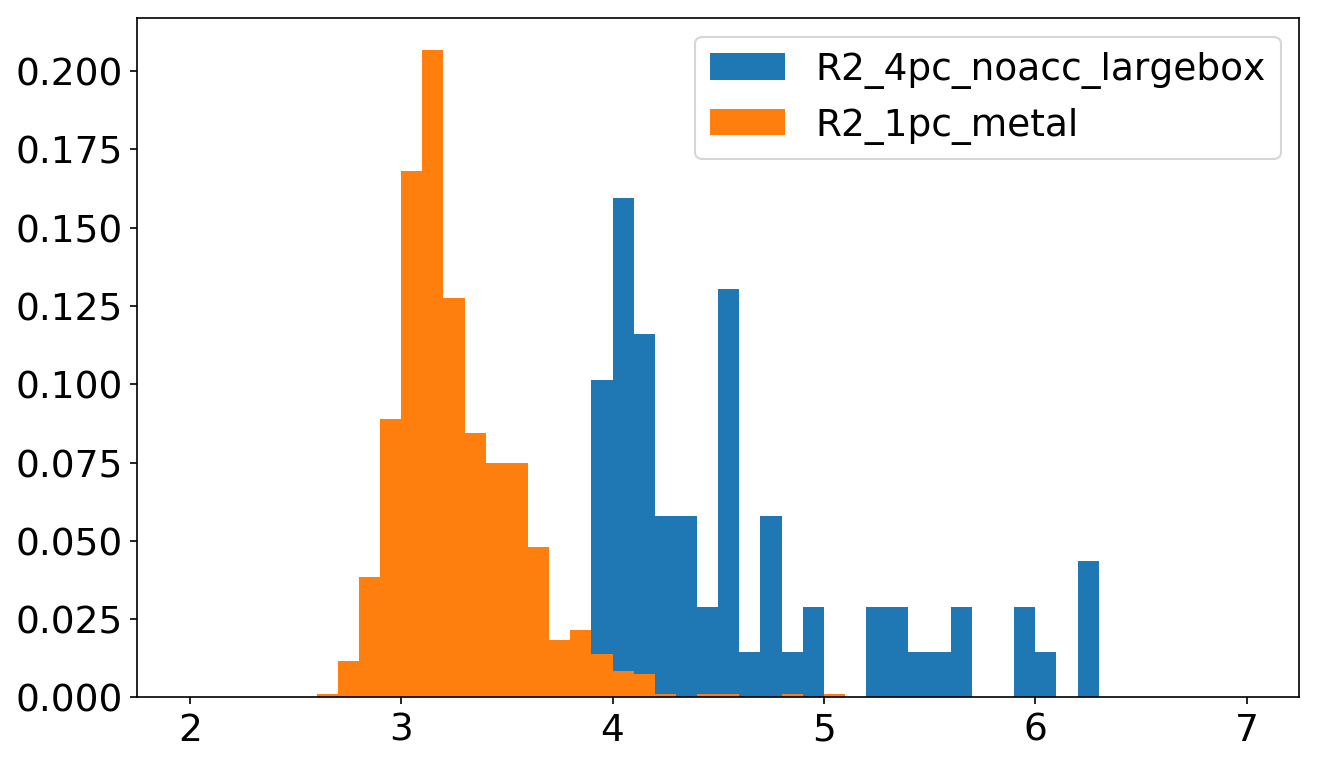

In [22]:
ids=['R2_4pc_noacc_largebox','R2_1pc_metal']
for pid in ids:

    starfiles=glob.glob('{}{}/starpar/{}.*.starpar.vtk'.format(base,pid,pid))
    starfiles.sort()
    sf=starfiles[-1]
    cl_hist,cl_edges,time=calc_normed_mass_funct(sf)
    norm_log_hist_plot(cl_hist/float(cl_hist.sum()),cl_edges,label=pid)
    plt.legend()